In [17]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import random


  




###### Set initial data

My training data :  $y = 0.5x + 0.1 + \sigma(0,0.1)$

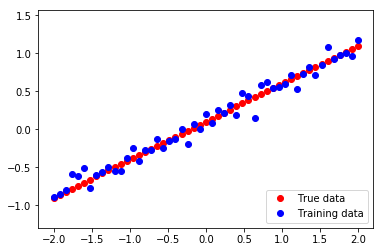

In [18]:
W_ref  = 0.5
b_ref = 0.1
nData = 51
noise_mu = 0
noise_std = 0.1

X_train = np.linspace(-2,2,nData)
Y_test = W_ref * X_train + b_ref
Y_train = Y_test + np.random.normal(noise_mu, noise_std, nData)

plt.figure(1)
plt.plot(X_train, Y_test, 'ro', label='True data')
plt.plot(X_train, Y_train, 'bo', label='Training data')
plt.axis('equal')
plt.legend(loc='lower right')
plt.show()

100
2
[1. 1.]
[5.241643   1.45247244]


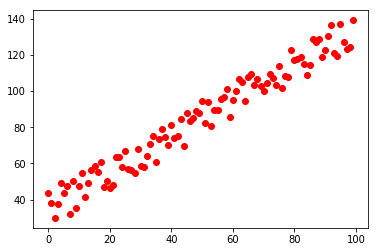

In [45]:
def gradientDescent(x, y, theta, alpha, m, numIterations):
    xTrans = x.transpose()
    for i in range(0, numIterations):
        hypothesis = np.dot(x, theta)
        loss = hypothesis - y
        # avg cost per example (the 2 in 2*m doesn't really matter here.
        # But to be consistent with the gradient, I include it)
        cost = np.sum(loss ** 2) / (2 * m)
#        print("Iteration %d | Cost: %f" % (i, cost))
        # avg gradient per example
        gradient = np.dot(xTrans, loss) / m
        # update
        theta = theta - alpha * gradient
    return theta

def genData(numPoints, bias, variance):
    x = np.zeros(shape=(numPoints, 2))
    y = np.zeros(shape=numPoints)
    # basically a straight line
    for i in range(0, numPoints):
        # bias feature
        x[i][0] = 1
        x[i][1] = i
        # our target variable
        y[i] = (i + bias) + random.uniform(0, 2) * variance
    plt.plot(y, 'ro', label='True data')
    return x, y

# gen 100 points with a bias of 25 and 10 variance as a bit of noise
x, y = genData(100, 25, 10)
m, n = np.shape(x)
print(m)
print(n)

numIterations= 1000
alpha = 0.0005
theta = np.ones(n)
theta = gradientDescent(x, y, theta, alpha, m, numIterations)
print(theta)